In [121]:
# import automatic differentiator to compute gradient module
from autograd import grad 
import autograd.numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [122]:
plt.rcParams['axes.grid'] = True

In [123]:
# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)
    #print(gradient)

    # run the gradient descent loop
    weight_history = [w]           # container for weight history
    cost_history = [g(w)]          # container for corresponding cost function history
    for k in range(max_its):
        # evaluate the gradient, store current weights and cost function value
        grad_eval = gradient(w)
        #print(grad_eval)
        

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

## Trying a convex function

<Axes: >

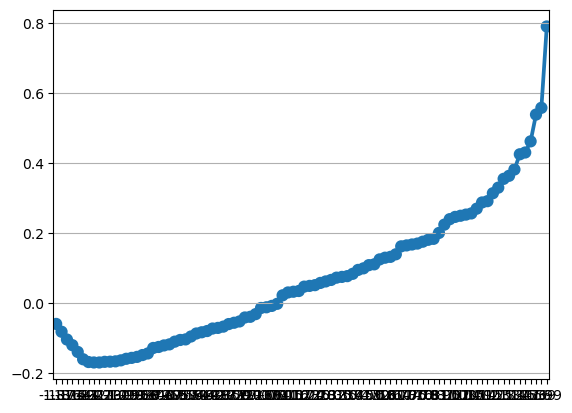

In [124]:
J = lambda w: 1/float(50)*(w**4 + w**2 + 10*w)
plt.figure()
N = 100
w = np.round(np.random.randn(N,1),2)
sns.pointplot(x = w.ravel(), y = J(w).ravel())
#print(g(w))

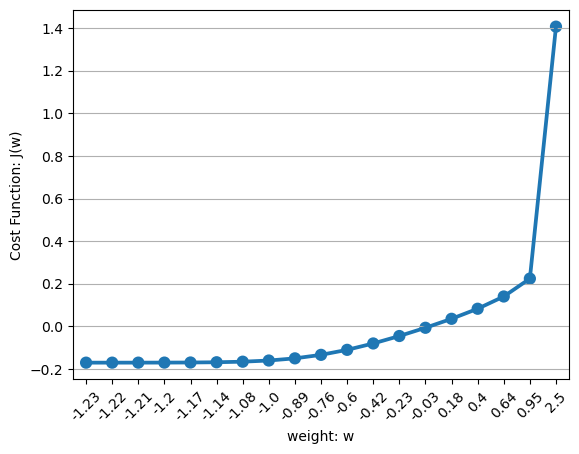

In [125]:


# run gradient descent 
w = 2.5; alpha = 1; max_its = 100
weight_history,cost_history = gradient_descent(J,alpha,max_its,w)
# plot the cost function history
sns.pointplot(x = np.round(weight_history,2), y = cost_history)
plt.xlabel('weight: w'); plt.ylabel('Cost Function: J(w)'); 
plt.xticks(rotation=45)
plt.show()

In [126]:
## A non-convex function
##  step length divergent
## step length osciiation in 1D

In [127]:
## step-length/Learning rate alpha is fixed
# Learning starts at different places and stops at the local minimum 
# Here learning rate is very low so it stays at the same place, does not diverge. If learning rate increases then it will diverge.

<Axes: >

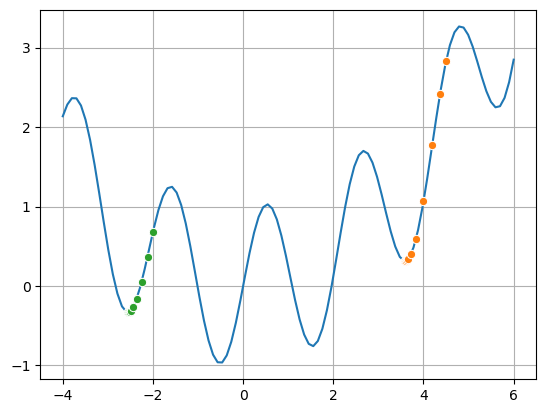

In [128]:
J = lambda w: np.sin(3*w) + 0.1*w**2

# run gradient descent 
w = 4.5; alpha = 0.05; max_its = 50
weight_history,cost_history = gradient_descent(J,alpha,max_its,w)

w = -2.0; alpha = 0.05; max_its = 10
weight_history_2,cost_history_2 = gradient_descent(J,alpha,max_its,w)

# plot the cost function history
w1 = np.linspace(-4,6,100)
sns.lineplot(x = w1,  y = J(w1))
sns.lineplot(x = np.round(weight_history,2), y = cost_history, marker ='o', linestyle='None')
sns.lineplot(x = np.round(weight_history_2,2), y = cost_history_2, marker ='o', linestyle='None')

In [129]:
## Alpha is large causing learning to diverge and overshoot the minimum

## 2-D example

In [250]:
g = lambda w: np.dot(w.T,w) #+ 2*np.dot(w.T,w)

# run gradient descent 
w = np.array([0.5,0.5]); max_its = 5; alpha =0.6;
weight_history,cost_history = gradient_descent(g,alpha,max_its,w)
weight_history

[array([0.5, 0.5]),
 array([-0.1, -0.1]),
 array([0.02, 0.02]),
 array([-0.004, -0.004]),
 array([0.0008, 0.0008]),
 array([-0.00016, -0.00016])]

[0.5 0.5]
[-0.1 -0.1]
[-0.1 -0.1]
[0.02 0.02]


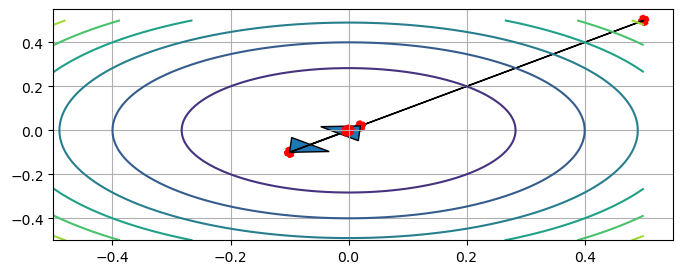

In [255]:
weight_1 = np.linspace(-0.5,0.5,100)
weight_2 = np.linspace(-0.5,0.5,100)

# run gradient descent 
w1_vals, w2_vals = np.meshgrid(weight_1,weight_2)
w1_vals.shape = (len(w1_vals)**2,1)
w2_vals.shape = (len(w2_vals)**2,1)
h = np.concatenate((w1_vals, w2_vals), axis =1)
func_vals = np.asarray([g(np.reshape(s, (2,1))) for s in h])
w1_vals.shape = (len(weight_1),len(weight_2))
w2_vals.shape = (len(weight_2),len(weight_1))
func_vals.shape = (len(weight_1),len(weight_2))

plt.figure(figsize = (8,3))
plt.contour(w1_vals, w2_vals, func_vals)
for j in range(len(weight_history)):
    w_val = weight_history[j]
    plt.scatter(w_val[0], w_val[1], linestyle='--', marker='o', s=50, c='r')
  
    # arrows = True
    # if 'arrows' in kwargs:
    #     arrows = kwargs['arrows']
    if j > 0:
                pt1 = weight_history[j-1]
                pt2 = weight_history[j]
                
                # produce scalar for arrow head length
                pt_length = np.linalg.norm(pt1 - pt2)
                head_length = 0.1
                alpha = (head_length - 0.35)/pt_length + 1
                
                # if points are different draw error
                if np.linalg.norm(pt1 - pt2) > head_length: #and arrows == True:
                    if np.ndim(pt1) > 1:
                        pt1 = pt1.flatten()
                        pt2 = pt2.flatten()
                        
                        
                    # draw color connectors for visualization
                    w_old = pt1
                    w_new = pt2
                    print(w_old)
                    print(w_new)
                    #plt.plot([w_old[0],w_new[0]],[w_old[1],w_new[1]],linewidth = 2,alpha = 1,zorder = 2)      # plot approx
                    plt.arrow(w_old[0],w_old[1],w_new[0]-w_old[0],w_new[1]-w_old[1],length_includes_head=True,head_width=0.09, head_length=0.05)
